In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Importing the Required Librarires
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Credit Card Transactions Fraud Detection Dataset

##### About Data Set:

````
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 30th June 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

We are going to build a model to detect credit card frauds which saves a lot of money for banks.

````

### Loading Dataset

In [5]:
#Reading two data sets and comn=bining them into single data frame
df1_1 = pd.read_csv("/content/drive/MyDrive/Fraud Analytics/fraudTrain.csv")
df1_1 = df1_1.drop(df1_1.columns[0], axis=1)

df1_2 = pd.read_csv("/content/drive/MyDrive/Fraud Analytics/fraudTest.csv")
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)

df = pd.concat([df1_1,df1_2])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0




---

# Data understanding, preparation, and EDA

---



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [7]:
#Checking null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.shape

(1852394, 22)

### Checking the distribution of the dependent variable


In [9]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


**This is highly imbalanced class data, there is a need to balance the dependent variable**

In [10]:
#Finiding unique values in each column
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

##Converting Data types and deriving attributes

###### Converting data type of [trans_date_trans_time] to datetime

In [11]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [12]:
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

###### Deriving 'Transaction Hour' Feature from 'Transaction Time' Feature

In [13]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

###### Deriving 'Day of Week' Feature from 'Transaction Time' Feature

In [14]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

##### Derive 'Year Month' Feature from 'Transaction Time' Feature


In [15]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

Plot for counts by category and by day of the week

Text(0.5, 1.0, 'Count by Day of the Week')

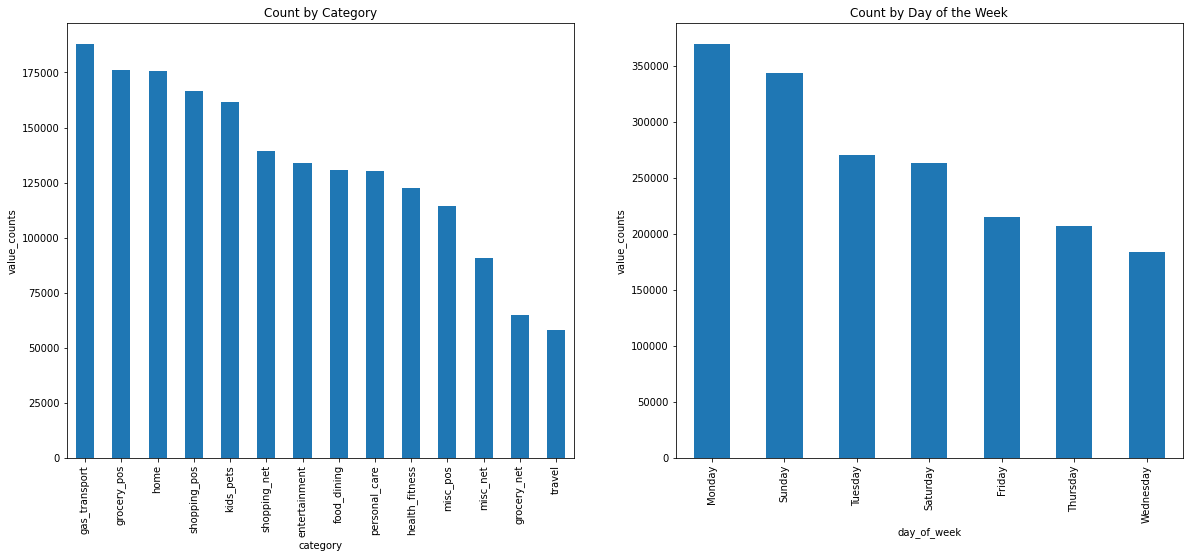

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.xlabel("category")
plt.ylabel("value_counts")
plt.title("Count by Category")
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();
plt.xlabel("day_of_week")
plt.ylabel("value_counts")
plt.title("Count by Day of the Week")


**Sundays and Mondays have relatively higher transactions**

Plot for counts by gender and month

Text(0.5, 1.0, 'Count by year month')

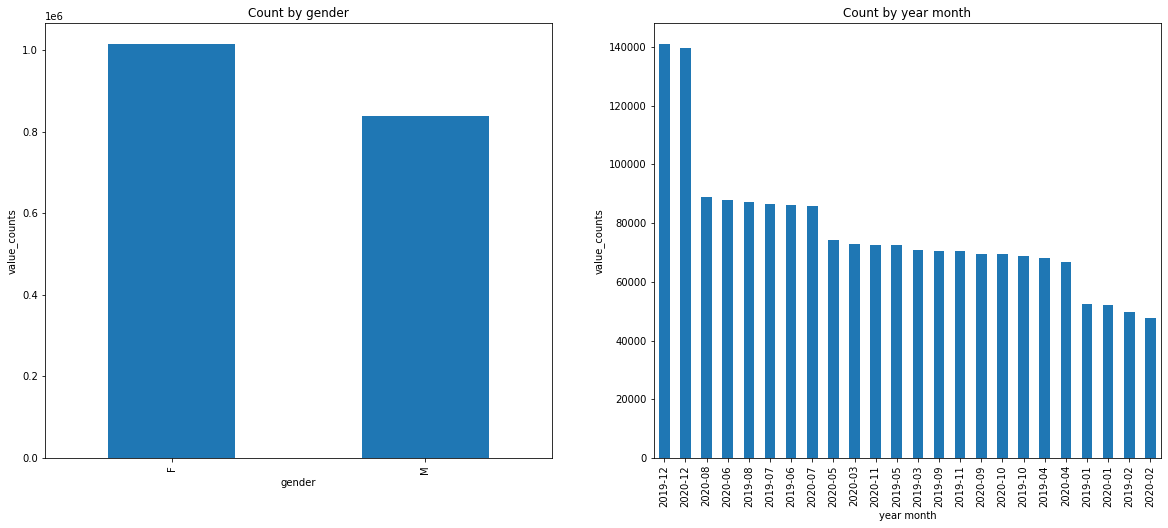

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.xlabel("gender")
plt.ylabel("value_counts")
plt.title("Count by gender")
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();
plt.xlabel("year month")
plt.ylabel("value_counts")
plt.title("Count by year month")



**There isn't a significant difference in the count by gender but,
Highest number of Transactions are in month of December and 
Lowest number of Transactions happens in February**


In [18]:
#Counts by State
df.state.value_counts(normalize=True)

TX   0.073024
NY   0.064467
PA   0.061635
CA   0.043455
OH   0.035968
MI   0.035535
IL   0.033585
FL   0.032809
AL   0.031592
MO   0.029639
MN   0.024527
AR   0.024083
NC   0.023286
VA   0.022542
WI   0.022532
SC   0.022528
KY   0.022123
IN   0.021345
IA   0.020948
OK   0.020541
MD   0.020160
GA   0.020158
WV   0.019720
NJ   0.018965
NE   0.018584
KS   0.017782
MS   0.016207
LA   0.016170
WY   0.014995
WA   0.014597
OR   0.014256
TN   0.013449
ME   0.012650
NM   0.012647
ND   0.011435
CO   0.010671
SD   0.009487
MA   0.009481
VT   0.009076
MT   0.009073
AZ   0.008293
UT   0.008290
NH   0.006331
CT   0.005927
NV   0.004350
ID   0.004338
DC   0.002769
HI   0.001970
AK   0.001600
RI   0.000402
DE   0.000005
Name: state, dtype: float64

In [19]:
#Count by Jobs
df.job.value_counts(normalize=True,ascending=False)

Film/video editor                                             0.007503
Exhibition designer                                           0.007108
Surveyor, land/geomatics                                      0.006713
Naval architect                                               0.006712
Materials engineer                                            0.006322
Designer, ceramics/pottery                                    0.006310
Environmental consultant                                      0.005924
Financial adviser                                             0.005918
Systems developer                                             0.005918
IT trainer                                                    0.005907
Copywriter, advertising                                       0.005529
Scientist, audiological                                       0.005525
Chartered public finance accountant                           0.005512
Chief Executive Officer                                       0.005506
Podiat

##### Deriving Age of the Customer: 

````
Age of Customer = Trasaction Date - DOB
````

In [20]:
df['dob'] = pd.to_datetime(df['dob'])

In [21]:
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age']

0        31.000000
1        41.000000
2        57.000000
3        52.000000
4        33.000000
            ...   
555714   55.000000
555715   21.000000
555716   39.000000
555717   55.000000
555718   28.000000
Name: age, Length: 1852394, dtype: float64

In [22]:
df['age'].describe()

count   1852394.000000
mean         46.266173
std          17.412388
min          14.000000
25%          33.000000
50%          44.000000
75%          57.000000
max          96.000000
Name: age, dtype: float64

**33-57 age people are 50% of the customers**

**Outliers:** 
Minimum age of customer is 14 
Maximum age of customer is 96

##### Distribution by Amount

In [23]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1852394.000000,1842743.000000,9651.000000
1,mean,70.063567,67.651278,530.661412
2,std,159.253975,153.548108,391.028873
3,min,1.000000,1.000000,1.060000
4,50%,47.450000,47.240000,390.000000
5,95%,195.340000,189.590000,1084.090000
6,99.9%,1517.241050,1519.622580,1293.127000
7,max,28948.900000,28948.900000,1376.040000


**Average value of the Fraudulent transactions are way higher than non-fraudulent transactions**

**Mean of Non Fraud Transactions: 67.6**

**Mean of Fraud Transactions: 530.6** 

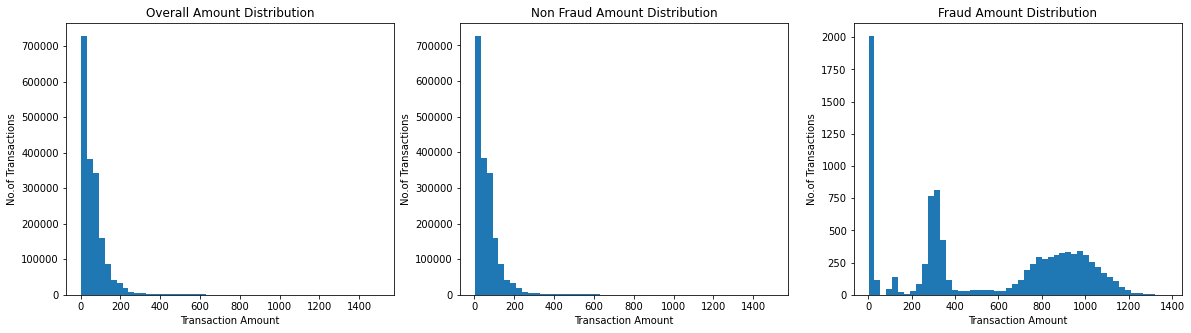

In [24]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amount Distribution')
ax[1].set_title('Non Fraud Amount Distribution')
ax[2].set_title('Fraud Amount Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('No.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[1].set_ylabel('No.of Transactions')
ax[2].set_xlabel('Transaction Amount')
ax[2].set_ylabel('No.of Transactions')
plt.show()

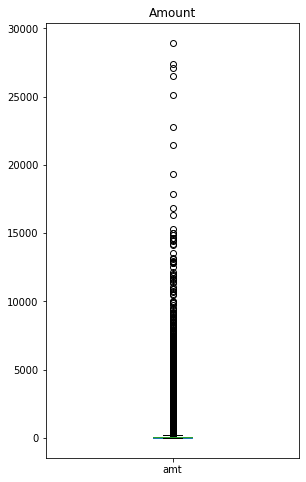

In [25]:
# Outliers in Amount
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df[col].plot.box()
    plt.title("Amount")
plt.show()

### Timeline Plots

#### Time series of the No. of Transactions

In [26]:
# No. of transactions and customers by year month
df_timeline01 = df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


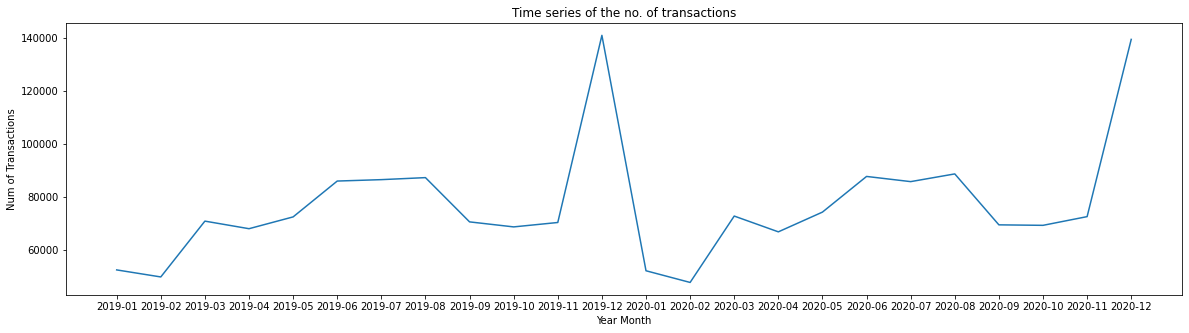

In [27]:
#Time series of the no. of transactions
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.title("Time series of the no. of transactions")
plt.show()


#### Time series for the number of customers

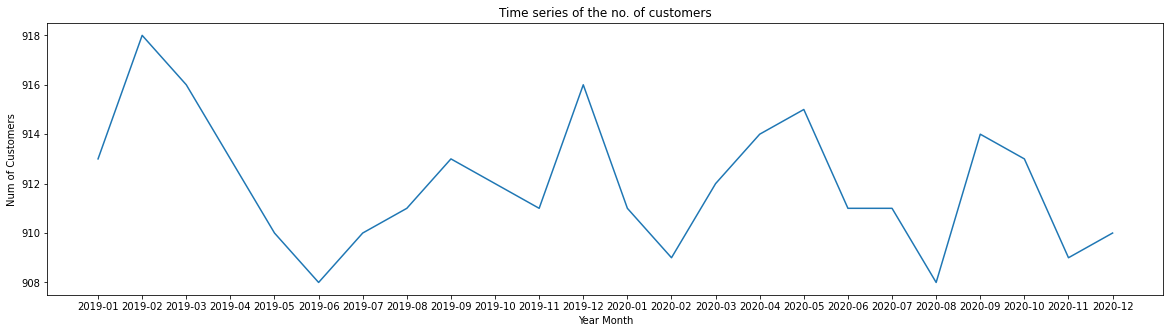

In [28]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.title("Time series of the no. of customers")
plt.show()


##### Distribution of the fraudulent transactions

In [29]:
#Distinct fraudulent transactions and customers
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


In [30]:
#Average fraudelent transactions by month
print(df_timeline02['num_of_fraud_transactions'].mean())

402.125


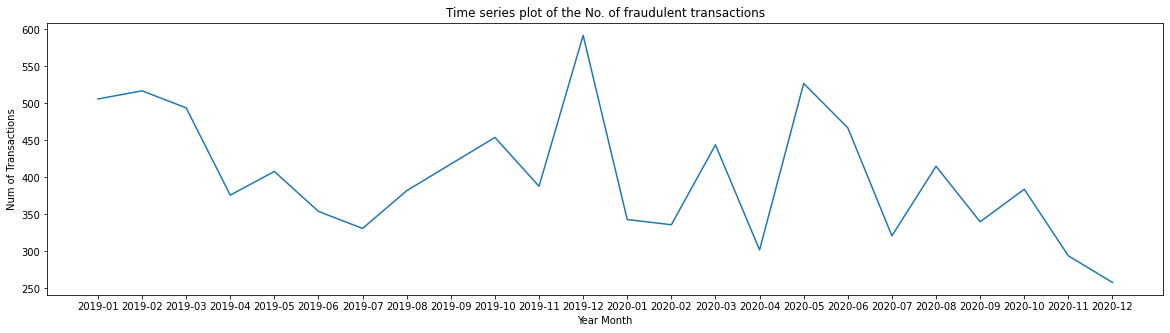

In [31]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.title("Time series plot of the No. of fraudulent transactions")
plt.show()

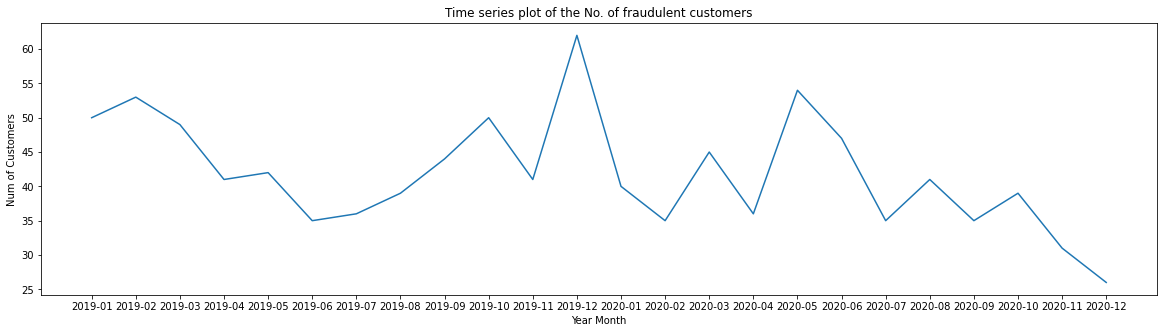

In [32]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.title("Time series plot of the No. of fraudulent customers")
plt.show()

#### Distribution by Gender

In [33]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,1014749,54.780408
1,M,837645,45.219592


Females customers are higher than male

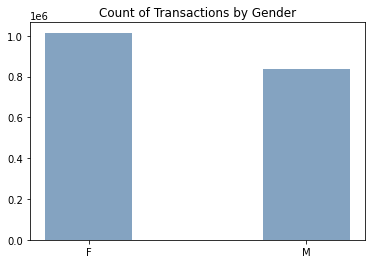

In [34]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.title("Count of Transactions by Gender")
plt.show()

In [35]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


##### Distribution by Category

In [36]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,188029,10.150594
4,grocery_pos,176191,9.511529
6,home,175460,9.472067
12,shopping_pos,166463,8.986371
7,kids_pets,161727,8.730702
11,shopping_net,139322,7.521186
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
10,personal_care,130085,7.022534
5,health_fitness,122553,6.615925


**gas_transport accounts for 10% of the transactions** 

In [37]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

,index,Category,category_count,percent
0,2,gas_transport,188029,10.150594
1,4,grocery_pos,176191,9.511529
2,6,home,175460,9.472067
3,12,shopping_pos,166463,8.986371
4,7,kids_pets,161727,8.730702
5,11,shopping_net,139322,7.521186
6,0,entertainment,134118,7.240252
7,1,food_dining,130729,7.057300
8,10,personal_care,130085,7.022534
9,5,health_fitness,122553,6.615925


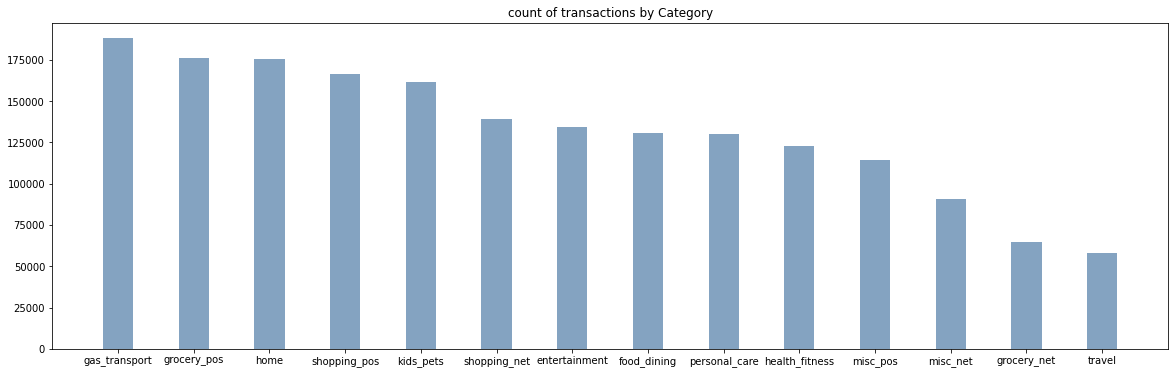

In [38]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)
plt.title("count of transactions by Category")
plt.show()

In [39]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100


In [40]:
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

,Category,is_fraud,count,category_count,percent,percent_grp
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537
13,home,1,265,175460,9.472067,0.151032
12,home,0,175195,175460,9.472067,99.848968
25,shopping_pos,1,1056,166463,8.986371,0.634375
24,shopping_pos,0,165407,166463,8.986371,99.365625
14,kids_pets,0,161423,161727,8.730702,99.812029
15,kids_pets,1,304,161727,8.730702,0.187971


**grocery_pos and shopping_net has more fraudulent transactions compared to other categories**

In [41]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
11,health_fitness,1,185,122553,6.615925,0.150955
13,home,1,265,175460,9.472067,0.151032
3,food_dining,1,205,130729,7.057300,0.156813
15,kids_pets,1,304,161727,8.730702,0.187971
1,entertainment,1,292,134118,7.240252,0.217719
21,personal_care,1,290,130085,7.022534,0.222931
27,travel,1,156,57956,3.128708,0.269170
7,grocery_net,1,175,64878,3.502387,0.269737
19,misc_pos,1,322,114229,6.166561,0.281890
5,gas_transport,1,772,188029,10.150594,0.410575


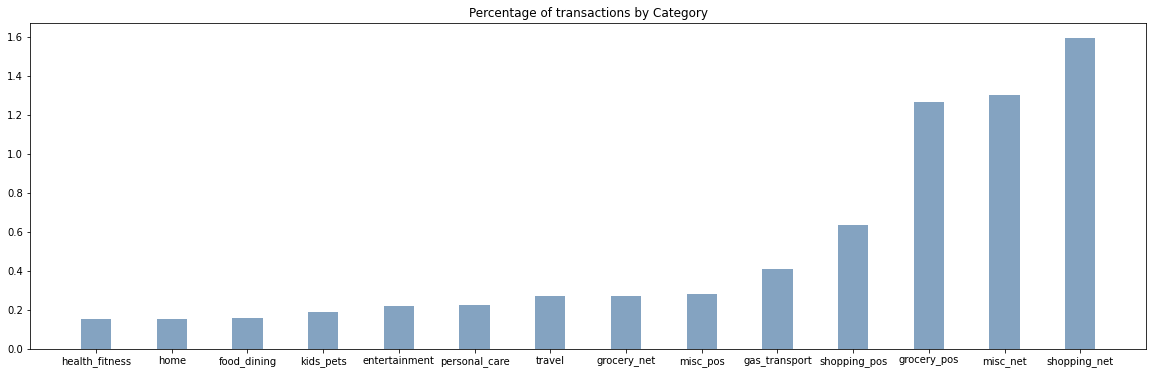

In [42]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)
plt.title("Percentage of transactions by Category")
plt.show()

##### Distribution by Merchant

In [43]:
df.merchant.value_counts(normalize=True, ascending=False)

fraud_Kilback LLC                             0.003380
fraud_Cormier LLC                             0.002832
fraud_Schumm PLC                              0.002804
fraud_Kuhn LLC                                0.002716
fraud_Boyer PLC                               0.002699
fraud_Dickinson Ltd                           0.002674
fraud_Emard Inc                               0.002088
fraud_Cummerata-Jones                         0.002084
fraud_Corwin-Collins                          0.002080
fraud_Rodriguez Group                         0.002075
fraud_Kling Inc                               0.002074
fraud_Erdman-Kertzmann                        0.002072
fraud_Parisian and Sons                       0.002072
fraud_Huels-Hahn                              0.002070
fraud_Stroman, Hudson and Erdman              0.002067
fraud_Kutch LLC                               0.002067
fraud_Jenkins, Hauck and Friesen              0.002061
fraud_Prohaska-Murray                         0.002056
fraud_Olso

In [44]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,6262,0.338049
105,fraud_Cormier LLC,5246,0.283201
571,fraud_Schumm PLC,5195,0.280448
349,fraud_Kuhn LLC,5031,0.271594
70,fraud_Boyer PLC,4999,0.269867
136,fraud_Dickinson Ltd,4953,0.267384
157,fraud_Emard Inc,3867,0.208757
117,fraud_Cummerata-Jones,3860,0.208379
107,fraud_Corwin-Collins,3853,0.208001
522,fraud_Rodriguez Group,3843,0.207461


In [45]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [46]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
673,fraud_Kozey-Boehm,1,60,2758,0.148888,2.175489
490,"fraud_Herman, Treutel and Dickens",1,38,1870,0.100950,2.032086
1226,fraud_Terry-Huel,1,56,2864,0.154611,1.955307
607,fraud_Kerluke-Abshire,1,50,2635,0.142248,1.897533
884,"fraud_Mosciski, Ziemann and Farrell",1,53,2821,0.152289,1.878766
1105,"fraud_Schmeler, Bashirian and Price",1,52,2788,0.150508,1.865136
691,fraud_Kuhic LLC,1,53,2842,0.153423,1.864884
563,fraud_Jast Ltd,1,51,2757,0.148834,1.849837
743,"fraud_Langworth, Boehm and Gulgowski",1,52,2817,0.152073,1.845935
1051,"fraud_Romaguera, Cruickshank and Greenholt",1,51,2767,0.149374,1.843151


One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction

In [47]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [48]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [49]:
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [50]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculating the great circular distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [51]:
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [52]:
df1['dist'].describe()

count   1852394.000000
mean         76.111726
std          29.116970
min           0.022255
25%          55.320087
50%          78.216380
75%          98.509467
max         152.117173
Name: dist, dtype: float64

In [53]:
df1.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

In [54]:
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist'],
      dtype='object')

##### Historic Variables

In [55]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744


In [56]:
df1['val_for_agg'] = 1

#### Rolling 60 day transactions by customer

In [57]:
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [58]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [59]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [60]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,1.000000
2,60416207185,2019-01-03,5.000000
3,60416207185,2019-01-04,7.000000
4,60416207185,2019-01-05,9.000000


#### Rolling 24 hours order by customer

In [61]:
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [62]:
df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.000000
1,60416207185,2019-01-02 08:44:57,1.000000
2,60416207185,2019-01-02 08:47:36,2.000000
3,60416207185,2019-01-02 12:38:14,3.000000
4,60416207185,2019-01-02 13:10:46,4.000000


#### Rolling 24 hrs fraud historic transactions

In [63]:
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [64]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,3.000000
4,60416207185,2019-03-02 22:10:59,2.000000


### Rolling 2 Hours Fraud by Customers

In [65]:
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [66]:
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,1.000000
4,60416207185,2019-03-02 22:10:59,1.000000


#### Rolling 60 Day Orders Amt Avg by Customers

In [67]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [68]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [69]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [70]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


###### Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']

In [71]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [72]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [73]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [74]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [75]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.000000,1.000000,0.000000,0.000000,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.000000,5.000000,0.000000,0.000000,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.000000,5.000000,0.000000,0.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,41.960000


In [76]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [77]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [78]:
corr = df2[cols].corr()

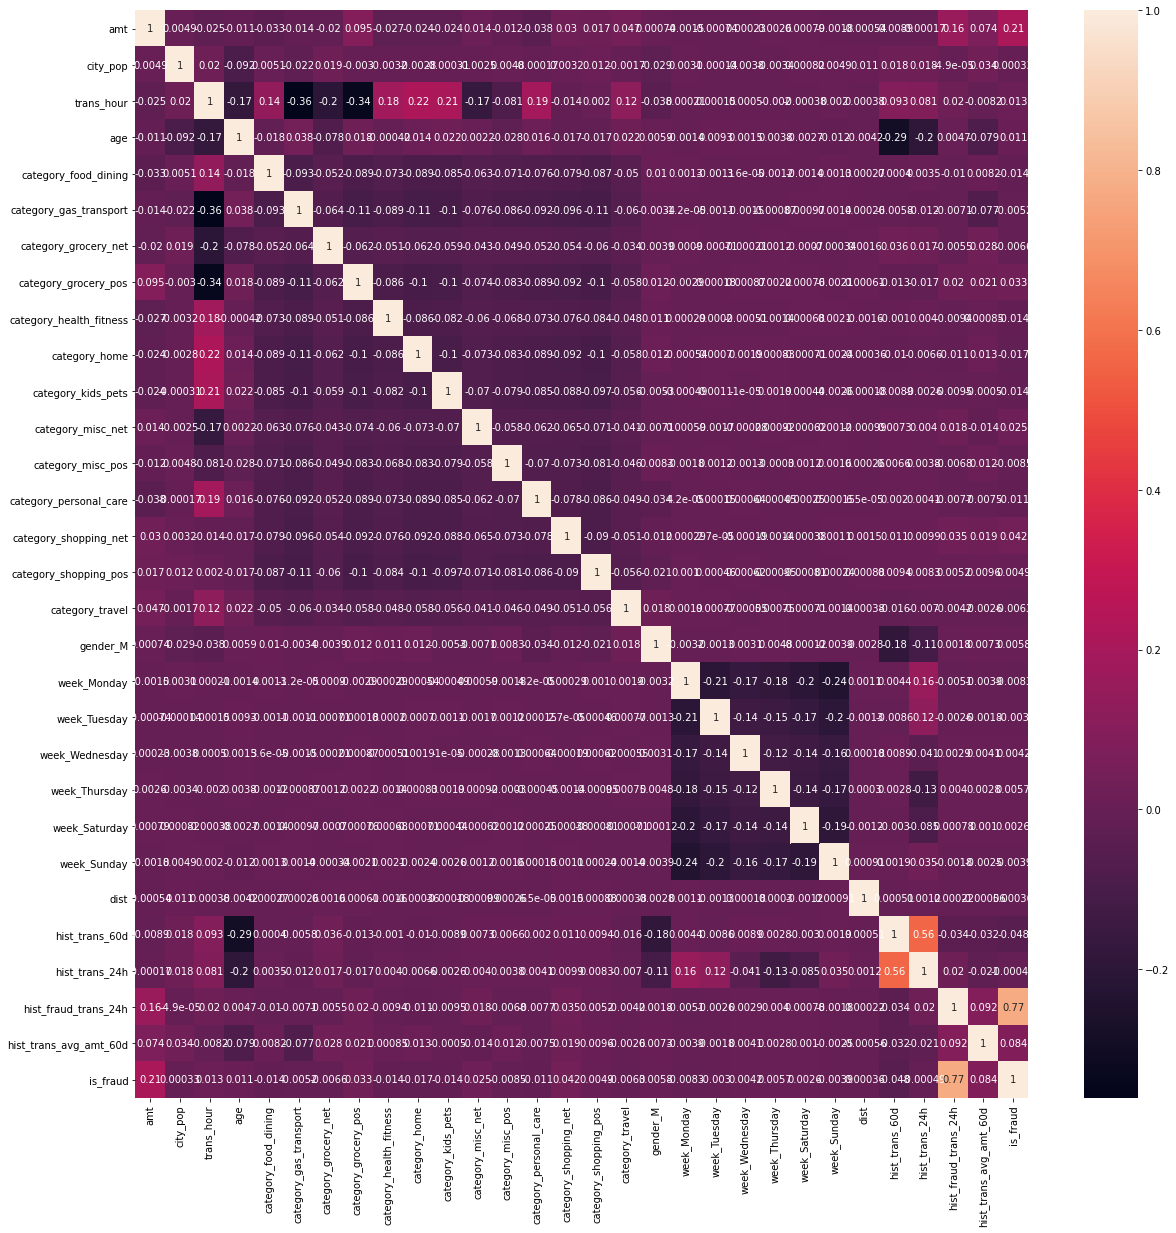

In [79]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

hist_fraud_trans_24h is highly correlated with is_fraud - 0.77

hist_trans_24h is also correlated with hist_trans_60d   - 0.56

##### Data visualization with plotly

In [80]:
import plotly
import plotly.graph_objects as go 

In [81]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.000000,1.000000,0.000000,0.000000,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.000000,5.000000,0.000000,0.000000,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.000000,5.000000,0.000000,0.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,41.960000


In [82]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [83]:
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['Job','tran_count_by_job']

df_job['percent'] = (df_job['tran_count_by_job']/df_job['tran_count_by_job'].sum())*100

df_job.sort_values(by = ['percent'], ascending=False)

,Job,tran_count_by_job,percent
194,Film/video editor,13898,0.750272
188,Exhibition designer,13167,0.710810
442,"Surveyor, land/geomatics",12436,0.671347
309,Naval architect,12434,0.671239
287,Materials engineer,11711,0.632209
121,"Designer, ceramics/pottery",11688,0.630967
179,Environmental consultant,10974,0.592423
195,Financial adviser,10963,0.591829
447,Systems developer,10962,0.591775
240,IT trainer,10943,0.590749


In [84]:
df_fraud_job = df[['job','is_fraud','trans_num']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['Job','is_fraud','count']

df_fraud_job =  df_fraud_job.merge(df_job[['Job','tran_count_by_job','percent']],how='inner',\
                                  left_on='Job',right_on='Job')


df_fraud_job['percent_grp'] = (df_fraud_job['count']/df_fraud_job['tran_count_by_job'])*100

In [85]:
job_plt_data = df_fraud_job.sort_values(by = ["tran_count_by_job"], ascending = False).head(20)

In [86]:
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp
378,Film/video editor,1,52,13898,0.750272,0.374155
377,Film/video editor,0,13846,13898,0.750272,99.625845
366,Exhibition designer,1,51,13167,0.710810,0.387332
365,Exhibition designer,0,13116,13167,0.710810,99.612668
861,"Surveyor, land/geomatics",0,12386,12436,0.671347,99.597941
862,"Surveyor, land/geomatics",1,50,12436,0.671347,0.402059
603,Naval architect,1,66,12434,0.671239,0.530803
602,Naval architect,0,12368,12434,0.671239,99.469197
559,Materials engineer,1,62,11711,0.632209,0.529417
558,Materials engineer,0,11649,11711,0.632209,99.470583


In [87]:
job_plt_data['label'] = 'Not Fraud'
job_plt_data.loc[job_plt_data['is_fraud']==1,['label']]= 'Fraud'
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp,label
378,Film/video editor,1,52,13898,0.750272,0.374155,Fraud
377,Film/video editor,0,13846,13898,0.750272,99.625845,Not Fraud
366,Exhibition designer,1,51,13167,0.710810,0.387332,Fraud
365,Exhibition designer,0,13116,13167,0.710810,99.612668,Not Fraud
861,"Surveyor, land/geomatics",0,12386,12436,0.671347,99.597941,Not Fraud
862,"Surveyor, land/geomatics",1,50,12436,0.671347,0.402059,Fraud
603,Naval architect,1,66,12434,0.671239,0.530803,Fraud
602,Naval architect,0,12368,12434,0.671239,99.469197,Not Fraud
559,Materials engineer,1,62,11711,0.632209,0.529417,Fraud
558,Materials engineer,0,11649,11711,0.632209,99.470583,Not Fraud


In [88]:
ne_grp = job_plt_data['Job'].unique()
print(ne_grp)

rm_grp = job_plt_data['label'].unique()
print(rm_grp)

['Film/video editor' 'Exhibition designer' 'Surveyor, land/geomatics'
 'Naval architect' 'Materials engineer' 'Designer, ceramics/pottery'
 'Environmental consultant' 'Financial adviser' 'Systems developer'
 'IT trainer']
['Fraud' 'Not Fraud']


In [89]:
fig = go.Figure(data=[
    go.Bar(name=rm_grp[0], x = ne_grp, y = job_plt_data[job_plt_data['label'] == rm_grp[0]]['percent_grp']),
])
fig.update_layout(xaxis_title="Job Group "\
                  ,yaxis_title="Fraud Percent of Listings", title = "Fraud Percent of Listings by job group")
fig.show()

##### Ploting Fraudulent Transactions in the Map

In [91]:
import plotly.express as px 

df2_fraud = df2[df2['is_fraud'] == 1]

fig = px.scatter_mapbox(df2_fraud, lat="lat", lon="long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



---


#Building the model


---



##### Test-Train Split

In [92]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] #,

Y_cols = ['is_fraud']

In [93]:
#Importing Library
from sklearn.model_selection import train_test_split

##### Oversampling

In [94]:
#As this dataset is highly imbalance we have to balance this by over sampling
cnt_non_fraud = df2[df2['is_fraud'] == 0]['amt'].count()
df2_class_fraud = df2[df2['is_fraud'] == 1]
df2_class_nonfraud = df2[df2['is_fraud'] == 0]

In [95]:
#OverSampling
df2_class_fraud_oversample = df2_class_fraud.sample(cnt_non_fraud, replace=True)
df2_oversampled = pd.concat([df2_class_nonfraud, df2_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df2_oversampled['is_fraud'].value_counts())

Random over-sampling:
1    1842831
0    1842831
Name: is_fraud, dtype: int64


In [96]:
df2_oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.000000,1.000000,0.000000,0.000000,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.000000,5.000000,0.000000,0.000000,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.000000,5.000000,0.000000,0.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,41.960000


####  Train and test split

In [97]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df2_oversampled[X_cols],df2_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [98]:
X_train.shape

(2579963, 29)

In [99]:
X_test.shape

(1105699, 29)

#### Logistic Regression

In [100]:
#Importing Library
from sklearn.linear_model import LogisticRegression

In [101]:
logreg = LogisticRegression(random_state=42)

In [102]:
#Building Logistic Regression  Model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[1210005   80003]
 [ 311108  978847]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86   1290008
           1       0.92      0.76      0.83   1289955

    accuracy                           0.85   2579963
   macro avg       0.86      0.85      0.85   2579963
weighted avg       0.86      0.85      0.85   2579963



In [106]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[518751  34072]
 [133635 419241]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86    552823
           1       0.92      0.76      0.83    552876

    accuracy                           0.85   1105699
   macro avg       0.86      0.85      0.85   1105699
weighted avg       0.86      0.85      0.85   1105699



##### Logistoic Regression model results:

Training data: 

Accuracy - 84%

recall   - 76%

Testing data:

Accuracy - 84%

recall   - 76%

#### Decision Tree

In [107]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### Decision Tree Model Evaluation

In [108]:
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1288950    1058]
 [      0 1289955]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [109]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[552229    594]
 [     0 552876]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



##### Decision Tree model results:

Training data: 

Accuracy - 100%

recall   - 100%

Testing data:

Accuracy - 100%

recall   - 100%

#### Random-Forest Classifier

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

#### Grid Search Random Forest

In [113]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=345,
                       verbose=1, warm_start=False)

#### Random Forest Classifier - Model Evaluation

In [114]:
print("Train Results")
pred_train = rf_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   17.5s finished


[[1289864     144]
 [    276 1289679]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [115]:
print("Test Results")
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.9s finished


[[552726     97]
 [    94 552782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



##### Random Forest model results:

Training data: 

Accuracy - 100%

recall   - 100%

Testing data:

Accuracy - 100%

recall   - 100%

#### Gradient Boosting Tress - Model Training

In [116]:
import sys
!{sys.executable} -m pip install xgboost

In [117]:
#Building XG Boost Model
from xgboost import XGBClassifier

# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train, y_train)

xbt_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose=1, verbosity=1)

#### Model Evaluation 

In [118]:
pred_train = xbt_model.predict(X_train)

In [119]:
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[1281888    8120]
 [  28716 1261239]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99   1290008
           1       0.99      0.98      0.99   1289955

    accuracy                           0.99   2579963
   macro avg       0.99      0.99      0.99   2579963
weighted avg       0.99      0.99      0.99   2579963



In [120]:
pred_test = xbt_model.predict(X_test)

In [121]:
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[549339   3484]
 [ 12255 540621]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    552823
           1       0.99      0.98      0.99    552876

    accuracy                           0.99   1105699
   macro avg       0.99      0.99      0.99   1105699
weighted avg       0.99      0.99      0.99   1105699



##### XGBoost model results:

Training data: 

Accuracy - 99%
recall   - 98%

Testing data:

Accuracy - 99%
recall   - 98%

#### Conclusion

To conclude, Decision Tree and Random Forest are the best models as they have highest recall 



---


# Cost benifit Analysis 


---




In [122]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1852394.000000,1842743.000000,9651.000000
1,mean,70.063567,67.651278,530.661412
2,std,159.253975,153.548108,391.028873
3,min,1.000000,1.000000,1.060000
4,50%,47.450000,47.240000,390.000000
5,95%,195.340000,189.590000,1084.090000
6,99.9%,1517.241050,1519.622580,1293.127000
7,max,28948.900000,28948.900000,1376.040000


In [123]:
#Monthly num_of_fraud_transactions  
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


In [124]:
#Average number of fraudulent transaction per month
df_timeline02['num_of_fraud_transactions'].mean()

402.125

In [125]:
df_timeline01

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


In [126]:
#Average Number of transactions per month(Cost Benifit Analysis)
print(df_timeline01['num_of_transactions'].mean())

77183.08333333333


In [127]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


Total number of frauds in data sets are 9651, this data set has 24 months, so on average 402.125 frauds per month

Our Decision Tree model has 100% recall, so our model is able to predict all the frauds